<a href="https://colab.research.google.com/github/Faouzi-Slimi/python_Avancee/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [51]:
# import package
import pandas as pd 
import numpy as np
from PIL import Image
import os


In [52]:
def get_data_set(filepath):
  imgs=[]
  labels = []
  print("start reading files...")
  for f in os.listdir(filepath):
    if not (f.endswith("pmg")):
      labels.append(f.split('.')[0])
      print("Reading files....")
      img = np.asarray(Image.open(filepath+"/"+f))
      imgs.append(img)
  print("Reading finished...")
  return np.asarray(imgs),labels
filepath = ("/content/drive/MyDrive/yalefaces")
imgs,labels = get_data_set(filepath)



start reading files...
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Readi

In [53]:
labels1 = np.array([labels[i][-2:] for i in range(len(labels))])



In [54]:

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(imgs,labels1,test_size=0.33, random_state=42)
xtrain.shape

(110, 243, 320)

In [55]:
#### ADD channels

xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],xtrain.shape[2],1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1],xtest.shape[2],1)

##
from tensorflow.keras.utils import to_categorical
ytrain1 = to_categorical(ytrain)
ytest1 = to_categorical(ytest)

ytrain = ytrain1[:,1:]
ytest = ytest1[:,1:]


# Create Model

In [56]:
## set the random_seed
import tensorflow as tf
tf.random.set_seed(42)
#### create model
from keras.layers import Flatten
from keras import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras.losses

Classifier = Sequential()
Classifier.add(Convolution2D(32,kernel_size = 9,input_shape=(243,320,1),activation = 'relu'))## stride = 1 par defaut 
Classifier.add(MaxPooling2D(pool_size=(8,8)))
Classifier.add(Flatten())
Classifier.add(Dense(units=248,activation="relu"))
Classifier.add(Dense(units=15,activation="softmax"))



In [57]:
from sklearn.utils import validation
Classifier.compile(optimizer='adam',loss = "categorical_crossentropy",metrics=["accuracy"])
History = Classifier.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=32)

Epoch 1/50
4/4 [==============================] - 1s 119ms/step - loss: 711.4379 - accuracy: 0.0727 - val_loss: 177.8359 - val_accuracy: 0.0545
Epoch 2/50
4/4 [==============================] - 0s 51ms/step - loss: 114.7496 - accuracy: 0.2182 - val_loss: 7.7165 - val_accuracy: 0.3091
Epoch 3/50
4/4 [==============================] - 0s 56ms/step - loss: 6.6018 - accuracy: 0.3727 - val_loss: 1.3933 - val_accuracy: 0.6909
Epoch 4/50
4/4 [==============================] - 0s 44ms/step - loss: 0.7420 - accuracy: 0.8000 - val_loss: 0.6127 - val_accuracy: 0.8364
Epoch 5/50
4/4 [==============================] - 0s 53ms/step - loss: 0.1015 - accuracy: 0.9636 - val_loss: 1.3782 - val_accuracy: 0.8182
Epoch 6/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.9838 - val_accuracy: 0.8364
Epoch 7/50
4/4 [==============================] - 0s 43ms/step - loss: 4.9307e-04 - accuracy: 1.0000 - val_loss: 2.0418 - val_accuracy: 0.8364
Epoch 8/50
4/4 [

In [58]:
# Plot summary for our model
Classifier.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 235, 312, 32)      2624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 39, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 36192)             0         
                                                                 
 dense_4 (Dense)             (None, 248)               8975864   
                                                                 
 dense_5 (Dense)             (None, 15)                3735      
                                                                 
Total params: 8,982,223
Trainable params: 8,982,223
Non-trainable params: 0
____________________________________________

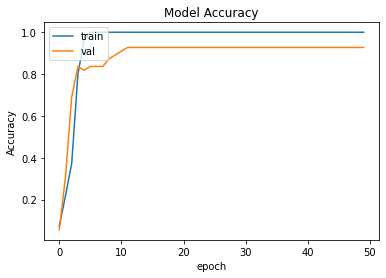

In [59]:
# Plot accuracy, loss ,  val_accuracy and val_los
import matplotlib.pyplot as plt
## Accuracy and val_accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


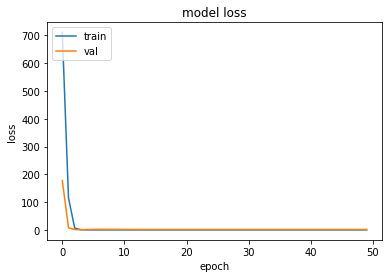

In [60]:
## loss and val_loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Fixe the model
- Set the kernel size to 16 in Conv2D
- Set the strideS = 2 in Conv2D 

In [61]:

# Set the random seed
tf.random.set_seed(42)
# Create model
from keras.layers.core.flatten import Flatten
from keras import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras.losses

Classifier1 = Sequential()
Classifier1.add(Convolution2D(32,kernel_size = 16,input_shape=(243,320,1),activation = 'relu',strides=2))
Classifier1.add(MaxPooling2D(pool_size=(8,8)))
Classifier1.add(Flatten())
Classifier1.add(Dense(units=248,activation="relu"))
Classifier1.add(Dense(units=15,activation="softmax"))



In [62]:
from sklearn.utils import validation
Classifier1.compile(optimizer='adam',loss = "categorical_crossentropy",metrics=["accuracy"])
History1 = Classifier1.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=32)

Epoch 1/50
4/4 [==============================] - 1s 96ms/step - loss: 259.0642 - accuracy: 0.1182 - val_loss: 12.0394 - val_accuracy: 0.1818
Epoch 2/50
4/4 [==============================] - 0s 39ms/step - loss: 5.2135 - accuracy: 0.3000 - val_loss: 2.0260 - val_accuracy: 0.4727
Epoch 3/50
4/4 [==============================] - 0s 36ms/step - loss: 1.5439 - accuracy: 0.6000 - val_loss: 1.2969 - val_accuracy: 0.5818
Epoch 4/50
4/4 [==============================] - 0s 29ms/step - loss: 0.9073 - accuracy: 0.6818 - val_loss: 0.6949 - val_accuracy: 0.8182
Epoch 5/50
4/4 [==============================] - 0s 26ms/step - loss: 0.3004 - accuracy: 0.9273 - val_loss: 0.5033 - val_accuracy: 0.8727
Epoch 6/50
4/4 [==============================] - 0s 25ms/step - loss: 0.0869 - accuracy: 0.9909 - val_loss: 0.3982 - val_accuracy: 0.8909
Epoch 7/50
4/4 [==============================] - 0s 25ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.2691 - val_accuracy: 0.9455
Epoch 8/50
4/4 [========

In [63]:
# Model Summary
Classifier1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 114, 153, 32)      8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 19, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 8512)              0         
                                                                 
 dense_6 (Dense)             (None, 248)               2111224   
                                                                 
 dense_7 (Dense)             (None, 15)                3735      
                                                                 
Total params: 2,123,183
Trainable params: 2,123,183
Non-trainable params: 0
____________________________________________

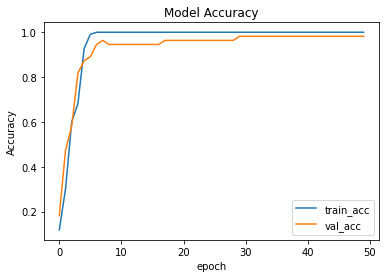

In [64]:
## Accuracy and val_accuracy
plt.plot(History1.history['accuracy'])
plt.plot(History1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='lower right')
plt.show()

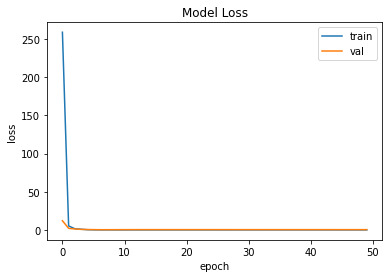

In [65]:
## loss and val_loss
plt.plot(History1.history['loss'])
plt.plot(History1.history['val_loss'])
plt.title('Model Loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Predict a picture

In [69]:
#Predict Subjuct01.centerlight
pd = Classifier1.predict(imgs[[0]])
prediction_class = np.argmax(pd,axis=1)+1
prediction_class

array([1])

In [70]:
#Predict Subjuct01.happy
pd = Classifier1.predict(imgs[[2]])
prediction_class = np.argmax(pd,axis=1)+1
prediction_class

array([1])

In [71]:
#Predict Subjuct02.centerlight
pd = Classifier1.predict(imgs[[11]])
prediction_class = np.argmax(pd,axis=1)+1
prediction_class

array([2])